The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


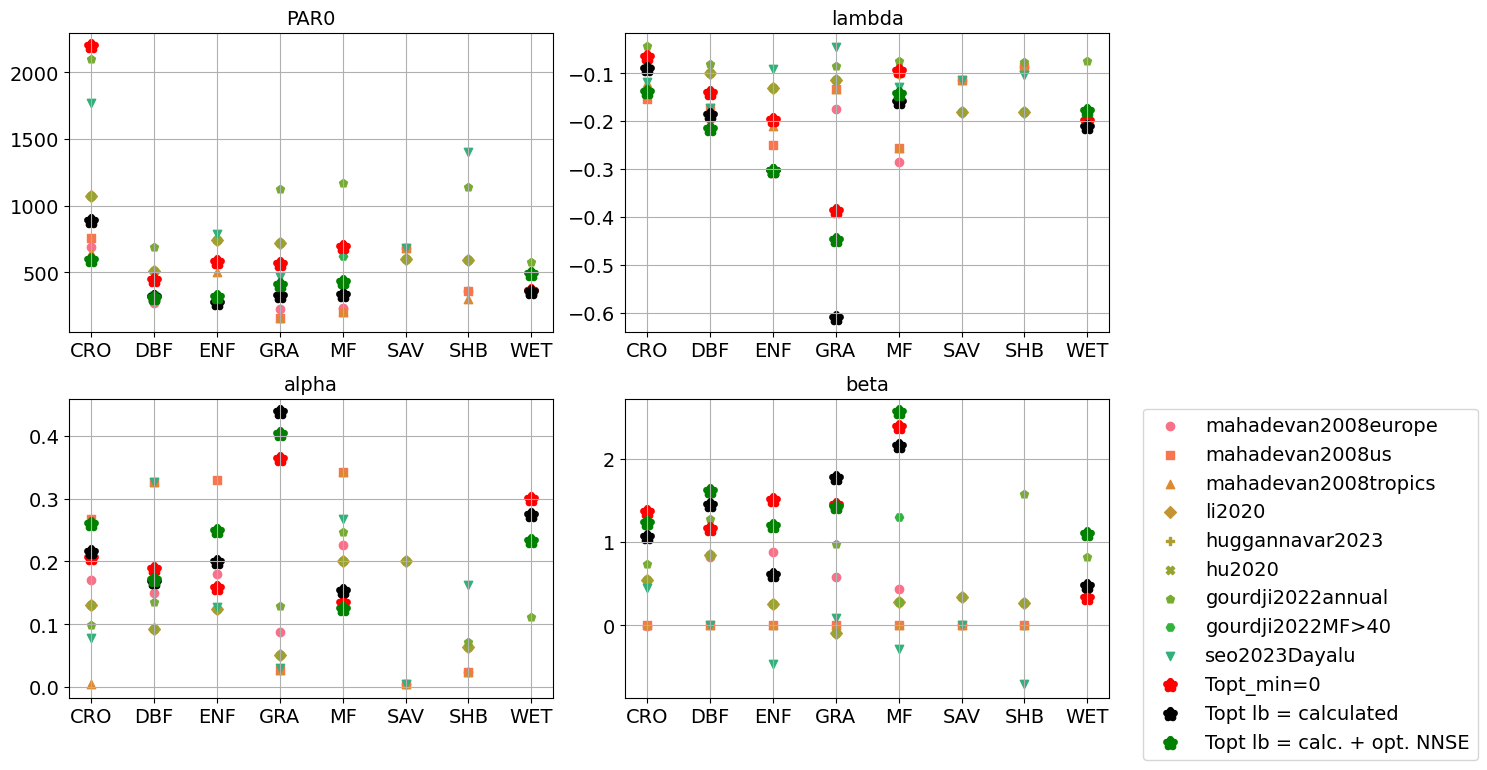

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

VPRM_old_or_new = "old"
run_ID = "diff_evo_V7_100"
run_ID_str = "Topt_min=0"
run_ID2 = "diff_evo_V10_100"
run_ID2_str = "Topt lb = calculated"
run_ID3 = "diff_evo_V18_200"
run_ID3_str = "Topt lb = calc. + opt. NNSE"
# run_ID4 = "diff_evo_V4_100"
# run_ID4_str = "original version"

with open("VPRM_all_params_literature_old_no_callewaert.csv", "r") as file:
    data = file.read()
tables = data.split("\n\n")

df_tuned_alps_outs = []
nr_of_tables = 0
for table in tables:
    if not table.strip():  # Skip empty tables
        continue
    df = pd.read_csv(StringIO(table))
    df.set_index(df.columns[0], inplace=True)
    dfs.append(df)
    nr_of_tables += 1
for df in dfs:
    df.sort_index(axis=1, inplace=True)

df_tuned_alps = pd.read_csv("Alps_parameters_median_old_Alps_VPRM_optimized_params_"+run_ID+".csv")
df_tuned_alps.drop(index=df_tuned_alps[df_tuned_alps['Parameter'] == 'Topt'].index, inplace=True)
df_tuned_alps['Parameter'] = df_tuned_alps['Parameter'].replace({'lambd': 'lambda'})
df_tuned_alps.loc[df_tuned_alps['Parameter'] == 'lambda', df_tuned_alps.columns != 'Parameter'] *= -1 #-0.505 # be aware that the values of λ and P AR0 might need to be adjusted when copying parameter values from literature since some studies use P AR = SW/0.505, while in the model code P AR = SW
df_tuned_alps.loc[df_tuned_alps['Parameter'] == 'PAR0', df_tuned_alps.columns != 'Parameter'] #*= 0.505
df_tuned_alps.set_index(df_tuned_alps.columns[0], inplace=True)
df_tuned_alps.sort_index(axis=1, inplace=True)

df_tuned_alps2 = pd.read_csv("Alps_parameters_median_old_Alps_VPRM_optimized_params_"+run_ID2+".csv")
df_tuned_alps2.drop(index=df_tuned_alps2[df_tuned_alps2['Parameter'] == 'Topt'].index, inplace=True)
df_tuned_alps2['Parameter'] = df_tuned_alps2['Parameter'].replace({'lambd': 'lambda'})
df_tuned_alps2.loc[df_tuned_alps2['Parameter'] == 'lambda', df_tuned_alps2.columns != 'Parameter'] *= -1 #-0.505
df_tuned_alps2.loc[df_tuned_alps2['Parameter'] == 'PAR0', df_tuned_alps2.columns != 'Parameter'] #*= 0.505
df_tuned_alps2.set_index(df_tuned_alps2.columns[0], inplace=True)
df_tuned_alps2.sort_index(axis=1, inplace=True)

df_tuned_alps3 = pd.read_csv("Alps_parameters_median_old_Alps_VPRM_optimized_params_"+run_ID3+".csv")
df_tuned_alps3.drop(index=df_tuned_alps3[df_tuned_alps3['Parameter'] == 'Topt'].index, inplace=True)
df_tuned_alps3['Parameter'] = df_tuned_alps3['Parameter'].replace({'lambd': 'lambda'})
df_tuned_alps3.loc[df_tuned_alps3['Parameter'] == 'lambda', df_tuned_alps3.columns != 'Parameter'] *= -1 #-0.505
df_tuned_alps3.loc[df_tuned_alps3['Parameter'] == 'PAR0', df_tuned_alps3.columns != 'Parameter'] #*= 0.505
df_tuned_alps3.set_index(df_tuned_alps3.columns[0], inplace=True)
df_tuned_alps3.sort_index(axis=1, inplace=True)

params = ['PAR0', 'lambda', 'alpha', 'beta']
colors = sns.color_palette("husl", len(dfs))
markers = ['o', 's', '^', 'D', 'P', 'X', 'p', 'H', 'v']

font_size = 14
fig, axes = plt.subplots(2, 2, figsize=(15, 8))  # Increase width of plots

for i, (param, ax) in enumerate(zip(params, axes.flat)):
    for j, (df, marker) in enumerate(zip(dfs, markers)):
        citation_name = df.index.name
        ax.scatter(df.columns, df.loc[param], marker=marker, label=citation_name, color=colors[j] ,linewidth=1)
        ax.grid(True)
    # Plot df_tuned_alps using thick black horizontal line as a marker
    ax.scatter(df_tuned_alps.columns, df_tuned_alps.loc[param], marker='*', color='red', label=run_ID_str, linewidth=5)  # Increase linewidth for df_tuned_alps
    ax.scatter(df_tuned_alps2.columns, df_tuned_alps2.loc[param], marker='*', color='black', label=run_ID2_str, linewidth=5)  # Increase linewidth for df_tuned_alps
    ax.scatter(df_tuned_alps3.columns, df_tuned_alps3.loc[param], marker='*', color='green', label=run_ID3_str, linewidth=5)  # Increase linewidth for df_tuned_alps
    ax.set_title(param, fontsize=font_size)
    ax.tick_params(axis='both', which='major', labelsize=font_size)

# Add a legend on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=font_size)

plt.tight_layout()
plt.savefig(
    "compare_params_to_literature_Topt_defined_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)



In [14]:
# Load the DataFrame and set index
df_tuned_alps_out = pd.read_csv("Alps_parameters_median_old_Alps_VPRM_optimized_params_" + run_ID3 + ".csv")
df_tuned_alps_out['Parameter'] = df_tuned_alps_out['Parameter'].replace({'lambd': 'lambda'})
df_tuned_alps_out.set_index("Parameter", inplace=True)

# Reorder and filter rows as required
desired_rows = ['PAR0', 'lambda', 'alpha', 'beta', 'Topt']
df_tuned_alps_out = df_tuned_alps_out.loc[desired_rows]

# Apply conversions
df_tuned_alps_out.loc['PAR0'] # *= 0.505  # Conversion for PAR0 -> TODO find out units, i think it needs no conversion
df_tuned_alps_out.loc['lambda'] *= -1  # Conversion for lambd

# Add values for SHB, SAV, and fill missing values with 0
df_tuned_alps_out["SAV"] = dfs[0].get("SAV", 0)
df_tuned_alps_out["SHB"] = dfs[0].get("SHB", 0)
df_tuned_alps_out["NON"] = 0.0

# Reorder columns as needed
desired_cols = ['ENF', 'DBF', 'MF', 'SHB', 'SAV', 'CRO', 'GRA', "NON"]
df_tuned_alps_out = df_tuned_alps_out[desired_cols]

# Fill missing values in the entire DataFrame with 0
df_tuned_alps_out = df_tuned_alps_out.fillna(20)

# Save the DataFrame to CSV with 3 decimal precision
df_tuned_alps_out.to_csv("parameters_for_WRF.csv", float_format='%.3f')

# Display the DataFrame
df_tuned_alps_out


,ENF,DBF,MF,SHB,SAV,CRO,GRA,NON
Parameter,,,,,,,,
PAR0,316.959342,310.777956,428.824566,363.0000,682.0000,595.856573,406.275695,0.0
lambda,-0.304472,-0.215909,-0.144240,-0.0874,-0.1141,-0.139570,-0.448322,0.0
alpha,0.248510,0.170438,0.123981,0.0239,0.0049,0.259913,0.402375,0.0
beta,1.192070,1.614536,2.553547,0.0000,0.0000,1.227500,1.416304,0.0
Topt,14.250000,23.580000,17.440000,20.0000,20.0000,22.000000,15.880000,0.0


In [15]:

# Format the data as required
formatted_data = (
    "DATA vprm_table_multi_eu &\n"
    "     / "
    + ", ".join(f"{value:.3f}" for value in df_tuned_alps_out.loc["PAR0"]) + ", &\n"
    "      "
    + ", ".join(f"{value:.3f}" for value in df_tuned_alps_out.loc["lambda"]) + ", &\n"
    "      "
    + ", ".join(f"{value:.3f}" for value in df_tuned_alps_out.loc["alpha"]) + ", &\n"
    "      "
    + ", ".join(f"{value:.3f}" for value in df_tuned_alps_out.loc["beta"]) + ", &\n"
    "      "
    + ", ".join(f"{value:.3f}" for value in df_tuned_alps_out.loc["Topt"]) + " /"
)

# Save to a text file
with open("vprm_table_multi_eu.csv", "w") as file:
    file.write(formatted_data)

print("File written as vprm_table_multi_eu.csv")

File written as vprm_table_multi_eu.csv


In [16]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from io import StringIO

# VPRM_old_or_new = "old"
# run_ID = "diff_evo_V10_100"

# with open("VPRM_all_params_literature_old_no_callewaert.csv", "r") as file:
#     data = file.read()
# tables = data.split("\n\n")

# dfs = []
# nr_of_tables = 0
# for table in tables:
#     if not table.strip():  # Skip empty tables
#         continue
#     df = pd.read_csv(StringIO(table))
#     df.set_index(df.columns[0], inplace=True)
#     dfs.append(df)
#     nr_of_tables += 1
# for df in dfs:
#     df.sort_index(axis=1, inplace=True)

# df_tuned_alps = pd.read_csv("Alps_parameters_median_old_Alps_VPRM_optimized_params_"+run_ID+".csv")
# df_tuned_alps.drop(index=df_tuned_alps[df_tuned_alps['Parameter'] == 'Topt'].index, inplace=True)
# df_tuned_alps['Parameter'] = df_tuned_alps['Parameter'].replace({'lambd': 'lambda'})
# df_tuned_alps.loc[df_tuned_alps['Parameter'] == 'lambda', df_tuned_alps.columns != 'Parameter'] *= -1
# df_tuned_alps.set_index(df_tuned_alps.columns[0], inplace=True)
# df_tuned_alps.sort_index(axis=1, inplace=True)

# df_tuned_alps2 = pd.read_csv("Europe_parameters_median_old_Europe_VPRM_optimized_params_"+run_ID+".csv")
# df_tuned_alps2.drop(index=df_tuned_alps2[df_tuned_alps2['Parameter'] == 'Topt'].index, inplace=True)
# df_tuned_alps2['Parameter'] = df_tuned_alps2['Parameter'].replace({'lambd': 'lambda'})
# df_tuned_alps2.loc[df_tuned_alps2['Parameter'] == 'lambda', df_tuned_alps2.columns != 'Parameter'] *= -1
# df_tuned_alps2.set_index(df_tuned_alps2.columns[0], inplace=True)
# df_tuned_alps2.sort_index(axis=1, inplace=True)


# params = ['PAR0', 'lambda', 'alpha', 'beta']
# colors = sns.color_palette("husl", len(dfs))
# markers = ['o', 's', '^', 'D', 'P', 'X', 'p', 'H', 'v']

# font_size = 14
# fig, axes = plt.subplots(2, 2, figsize=(15, 8))  # Increase width of plots

# for i, (param, ax) in enumerate(zip(params, axes.flat)):
#     for j, (df, marker) in enumerate(zip(dfs, markers)):
#         citation_name = df.index.name
#         ax.scatter(df.columns, df.loc[param], marker=marker, label=citation_name, color=colors[j])
#         ax.grid(True)
#     # Plot df_tuned_alps using thick black horizontal line as a marker
#     ax.scatter(df_tuned_alps.columns, df_tuned_alps.loc[param], marker='*', color='black', label='alps_R24', linewidth=2)  # Increase linewidth for df_tuned_alps
#     ax.scatter(df_tuned_alps2.columns, df_tuned_alps2.loc[param], marker='*', color='red', label='europe_R24', linewidth=2)  # Increase linewidth for df_tuned_alps
#     ax.set_title(param, fontsize=font_size)
#     ax.tick_params(axis='both', which='major', labelsize=font_size)

# # Add a legend on the right side
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=font_size)

# plt.tight_layout()
# plt.savefig(
#     "compare_params_to_literature_"
#     + VPRM_old_or_new
#     + "_"
#     + run_ID
#     + ".eps",
#     dpi=300,
#     bbox_inches="tight",
# )



In [17]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from io import StringIO

# VPRM_old_or_new = "new"
# # run_ID = "diff_evo_V9_100"

# with open("VPRM_all_params_literature_"+VPRM_old_or_new+".csv", "r") as file:
#     data = file.read()
# tables = data.split("\n\n")

# dfs = []
# nr_of_tables = 0
# for table in tables:
#     if not table.strip():  # Skip empty tables
#         continue
#     df = pd.read_csv(StringIO(table))
#     df.set_index(df.columns[0], inplace=True)
#     dfs.append(df)
#     nr_of_tables += 1
# for df in dfs:
#     df.sort_index(axis=1, inplace=True)
    

# # Alps_parameters_mean_new_Alps_VPRM_optimized_params_diff_evo_V4_100
# # Alps_parameters_mean_new_Europe_VPRM_optimized_params_diff_evo_V4_100.csv'

# df_tuned_alps = pd.read_csv("Alps_parameters_median_"+VPRM_old_or_new+"_Alps_VPRM_optimized_params_"+run_ID+".csv")
# #df_tuned_alps.drop(index=df_tuned_alps[df_tuned_alps['Parameter'] == 'Topt'].index, inplace=True)
# df_tuned_alps['Parameter'] = df_tuned_alps['Parameter'].replace({'lambd': 'lambda'})
# df_tuned_alps.loc[df_tuned_alps['Parameter'] == 'lambda', df_tuned_alps.columns != 'Parameter'] *= -1
# df_tuned_alps.set_index(df_tuned_alps.columns[0], inplace=True)
# df_tuned_alps.sort_index(axis=1, inplace=True)
# #
# df_tuned_alps2 = pd.read_csv("Europe_parameters_median_"+VPRM_old_or_new+"_Europe_VPRM_optimized_params_"+run_ID+".csv")
# #df_tuned_alps2.drop(index=df_tuned_alps2[df_tuned_alps2['Parameter'] == 'Topt'].index, inplace=True)
# df_tuned_alps2['Parameter'] = df_tuned_alps2['Parameter'].replace({'lambd': 'lambda'})
# df_tuned_alps2.loc[df_tuned_alps2['Parameter'] == 'lambda', df_tuned_alps2.columns != 'Parameter'] *= -1
# df_tuned_alps2.set_index(df_tuned_alps2.columns[0], inplace=True)
# df_tuned_alps2.sort_index(axis=1, inplace=True)



# params = ['Topt','T_crit', 'T_mult', 'lambda', 'PAR0', 'beta','alpha1', 'alpha2', 'gamma', 'theta1', 'theta2', 'theta3']
# colors = sns.color_palette("husl", len(dfs))
# markers = ['o', 's', '^', 'D', 'P', 'X', 'p', 'H', 'v']




# fig, axes = plt.subplots(3, 4, figsize=(15, 8))  # Increase width of plots

# for i, (param, ax) in enumerate(zip(params, axes.flat)):
#     for j, (df, marker) in enumerate(zip(dfs, markers)):
#         citation_name = df.index.name
#         ax.scatter(df.columns, df.loc[param], marker=marker, label=citation_name, color=colors[j])
#         ax.tick_params(axis='x', rotation=45)
#         ax.grid(True)
#     # Plot df_tuned_alps using thick black horizontal line as a marker
#     ax.scatter(df_tuned_alps.columns, df_tuned_alps.loc[param], marker='*', color='black', label='alps_R24', linewidth=2)  # Increase linewidth for df_tuned_alps
#     ax.scatter(df_tuned_alps2.columns, df_tuned_alps2.loc[param], marker='*', color='red', label='europe_R24', linewidth=2)  # Increase linewidth for df_tuned_alps
#     ax.tick_params(axis='x', rotation=45)
#     ax.set_title(param, fontsize=font_size)
#     ax.tick_params(axis='both', which='major', labelsize=font_size-2)

# # Add a legend on the right side
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=font_size)

# plt.tight_layout()
# plt.savefig(
#     "compare_params_to_literature_"
#     + VPRM_old_or_new
#     + "_"
#     + run_ID
#     + ".eps",
#     dpi=300,
#     bbox_inches="tight",
# )

